Часть 1
1.Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,sigma^2).

In [279]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as stats

In [280]:
n = 164
mu, sigma = 1,2
q = 2.0
k = 3

In [281]:
s = np.random.normal(mu, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
(a_estimate,sigma_estimate)

(np.float64(1.1482480056577047), np.float64(2.2506798598627444))

1.1 Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, указанном в Вашем варианте. Вычислить средствами Python сумму абсолютных частот. Построить гистограмму абсолютных частот.

In [282]:
count, bin_edges = np.histogram(s, np.histogram_bin_edges(s, 'sturges'))
print("Интервальный ряд абсолютных частот:")
print(count)
print(bin_edges)
sum(count)

Интервальный ряд абсолютных частот:
[ 9 11 20 24 39 28 22  8  3]
[-3.99616714 -2.81648898 -1.63681082 -0.45713265  0.72254551  1.90222367
  3.08190183  4.26158     5.44125816  6.62093632]


np.int64(164)

[-3.99616714 -2.81648898 -1.63681082 -0.45713265  0.72254551  1.90222367
  3.08190183  4.26158     5.44125816  6.62093632]
[ 9. 11. 20. 24. 39. 28. 22.  8.  3.]


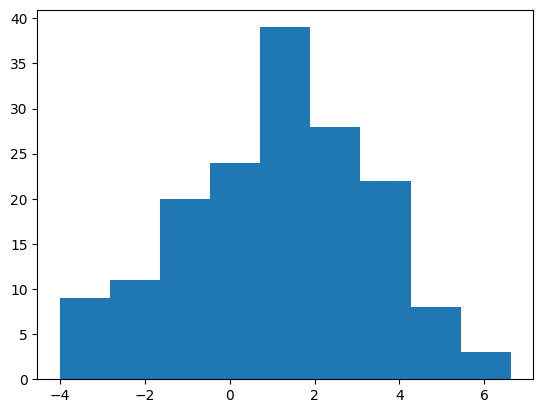

In [283]:
count, bins, ignored = plt.hist(s, bin_edges)
sum(count)
print(bins)
print(count)

1.2. Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить гистограмму относительных частот.

Интервальный ряд относительных частот: 
[0.04265101 0.07463927 0.11729028 0.2025923  0.17593542 0.12262165
 0.07463927 0.02132551 0.03198826]
Правая границы (k=3) интервала: 0.13270642677761701
Сумма:0.863682957147249
[-3.40632806 -2.2266499  -1.04697174  0.13270643  1.31238459  2.49206275
  3.67174092  4.85141908  6.03109724  6.62093632]


np.float64(1.0188679245283019)

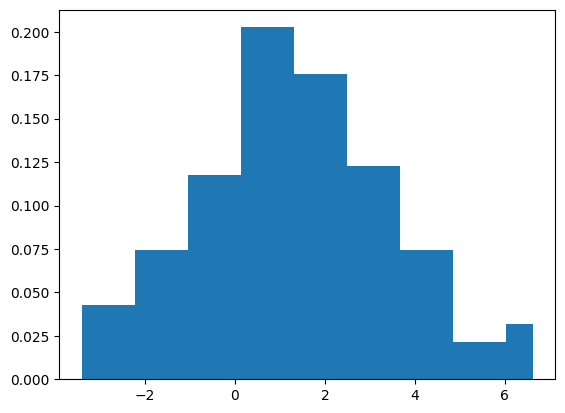

In [293]:
count, bins, ignored = plt.hist(s, bin_edges, density = True)
print("Интервальный ряд относительных частот: ")
print(count)
print(f"Правая границы (k=3) интервала: {bin_edges[k]}")
print(f"Сумма:{np.sum(count)}")
print(bins)
sum(count * (bins[1] - bins[0]))

2. Для визуализации данных:

    2.1. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

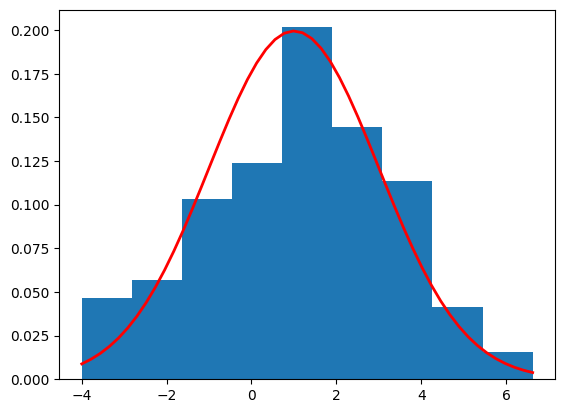

In [285]:
from scipy.stats import norm
x_values = np.linspace(bin_edges[0], bin_edges[-1])
plt.plot(x_values, norm.pdf(x_values, mu, sigma), linewidth=2, color='r')
count, bins, ignored = plt.hist(s, bin_edges, density=True)

2.2. Построить гистограмму абсолютных частот и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

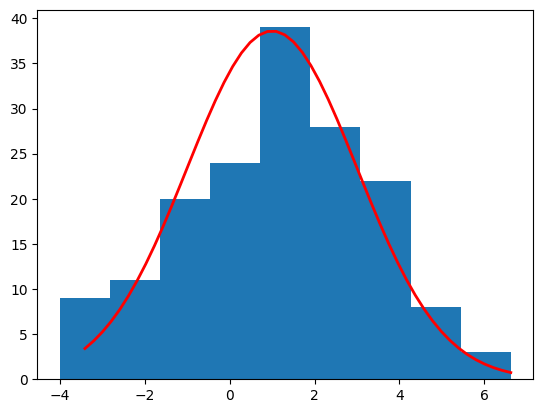

In [286]:
count, bins, ignored = plt.hist(s, bin_edges)
for i in range(0, len(bin_edges) - 1):
    bin_edges[i] = (bin_edges[i] + bin_edges[i+1])/2
x_values = np.linspace(bin_edges[0], bin_edges[-1])
step = bin_edges[1] - bin_edges[0]
plt.plot(x_values, norm.pdf(x_values, mu, sigma) * step * n, linewidth=2, color='r')

2.3 Построить по выборке график эмпирической функции распределения 
случайной величины X (кумуляту относительных частот) и график 
теоретической функции распределения случайной величины X, разместив их 
на одном рисунке.

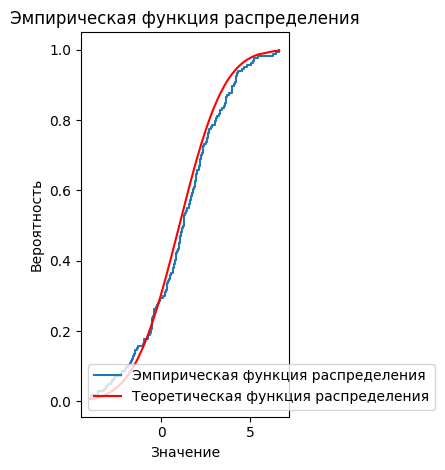

In [287]:
plt.subplot(1, 2, 2)
sorted_data = np.sort(s)
ecdf = np.arange(1, n + 1) / n
plt.step(sorted_data, ecdf, label='Эмпирическая функция распределения', where='post')
plt.plot(sorted_data, norm.cdf(sorted_data, mu, sigma), 'r-', label='Теоретическая функция распределения')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()

plt.tight_layout()
plt.show()

2.4 Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему 
статистическую интерпретацию. В частности, ответить на вопрос: Каково 
теоретически ожидаемое число выбросов для выборки данного объема?

Количество выбросов: 0


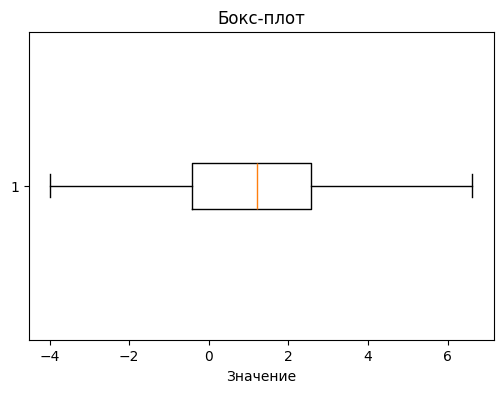

In [288]:
plt.figure(figsize=(6, 4))
plt.boxplot(s, vert=False)
plt.title('Бокс-плот')
plt.xlabel('Значение')

# Статистическая интерпретация
q1 = np.percentile(s, 25)
q3 = np.percentile(s, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = s[(s < lower_bound) | (s > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")

plt.show()

In [299]:

# Определение границ выбросов
lower_bound = mu - k * sigma
upper_bound = mu + k * sigma

# Вычисление вероятностей для выбросов
p_below = stats.norm.cdf(lower_bound, mu, sigma)  # P(X < lower_bound)
p_above = 1 - stats.norm.cdf(upper_bound, mu, sigma)  # P(X > upper_bound)

# Общая вероятность выбросов
p_outliers = p_below + p_above

# Ожидаемое количество выбросов
expected_outliers = n * p_outliers

# Вывод результатов
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")
print(f"Вероятность быть ниже нижней границы: {p_below:.6f}")
print(f"Вероятность быть выше верхней границы: {p_above:.6f}")
print(f"Общая вероятность выбросов: {p_outliers:.6f}")
print(f"Ожидаемое количество выбросов: {expected_outliers:.2f}")

Нижняя граница выбросов: -5.00
Верхняя граница выбросов: 7.00
Вероятность быть ниже нижней границы: 0.001350
Вероятность быть выше верхней границы: 0.001350
Общая вероятность выбросов: 0.002700
Ожидаемое количество выбросов: 0.44


A) Какова Ваша оценка вероятности попадания значений случайной величины X в k-ый
интервал полученной группировки?

np.float64(0.1172902781311079)

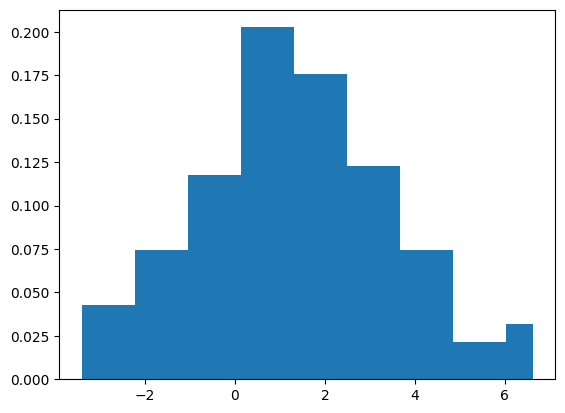

In [295]:
count, bins, ignored = plt.hist(s, bin_edges, density = True)
count[2]

B) Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой
оценки, покажите ее на графике.

График, который содержит геометрическую интерпретацию вероятности попадания в k-ый интервал, это гистограмма абсолютных частот. На ней высота столбца для k-го интервала будет соответствовать оценке вероятности.

C) Какой из полученных в п.2 графиков содержит геометрическую интерпретацию
вероятности попадания значений случайной величины X в k-ый интервал, покажите
ее на графике.

Эмпирическая функция распределения (ЭФР) также содержит геометрическую интерпретацию вероятности попадания в интервал. На этом графике вероятность попадания в k-ый интервал будет равна разности значений ЭФР на границах интервала.

D) Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки? А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?

Оценка значения интегральной функции распределения в правой границе k-ого интервала будет равна значению эмпирической функции распределения на правой границе этого интервала.
Таким образом, значение интегральной функции распределения в правой границе интервала 

In [298]:
F_x = norm.cdf(bin_edges[k], loc=mu, scale=sigma)

print(f"Значение интегральной функции распределения F({bin_edges[k]}) = {F_x:.5f}")

Значение интегральной функции распределения F(0.13270642677761701) = 0.33227


3.Используя таблицу значений функции Лапласа, найти вероятность 
(вычисления вероятности сделать “вручную” )

3.1. Найти вероятность, используя встроенные функции Python.

In [273]:
# Находим вероятность
probability = stats.norm.cdf(mu + q * sigma) - stats.norm.cdf(mu - q * sigma)
print(f"Вероятность: {probability}")

Вероятность: 0.998649815316798


3.2. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события.

In [274]:
n = 1000  # размер выборки
sample = np.random.normal(mu, sigma, size=n)  # генерация выборки

# Оценка вероятности
count = np.sum((sample > (mu - q * sigma)) & (sample < (mu + q * sigma)))
relative_frequency = count / n
print(f"Оценка вероятности (относительная частота): {relative_frequency}")

Оценка вероятности (относительная частота): 0.944


3.3. Увеличьте объем выборки n в 50 раз и повторите п. 3.2. Объясните, как увеличение объема выборки повлияло на точность оценки вероятности (*).

In [275]:
n_new = n * 50  # Увеличиваем размер выборки
sample_new = np.random.normal(mu, sigma, size=n_new)

# Оценка вероятности с новой выборкой
count_new = np.sum((sample_new > (mu - q * sigma)) & (sample_new < (mu + q * sigma)))
relative_frequency_new = count_new / n_new
print(f"Оценка вероятности (относительная частота) с новой выборкой: {relative_frequency_new}")

Оценка вероятности (относительная частота) с новой выборкой: 0.9553


Увеличение объема выборки обычно приводит к улучшению точности оценки вероятности. Это связано с тем, что большая выборка лучше отражает истинное распределение данных, что уменьшает вариацию оценок и позволяет получить более надежные результаты. С увеличением размера выборки относительная частота будет стремиться к истинной вероятности, согласно закону больших чисел.

4.Вычислить по выборке точечные оценки параметров распределения случайной величины 
X: математического ожидания, медианы, дисперсии, стандартного отклонения, 
коэффициента ассиметрии, эксцесса двумя способами:

4.1. первый способ –непосредственное применение формул для вычисления 
точечных оценок;

In [276]:
n = 1000  # размер выборки
sample = np.random.normal(mu, sigma, n)

# Вычисление параметров
mean = np.mean(sample)
median = np.median(sample)
variance = np.var(sample, ddof=1)  # с поправкой на смещение
std_dev = np.sqrt(variance)

# Коэффициент асимметрии и эксцесс
skewness = np.sum(((sample - mean) / std_dev) ** 3) / n
kurtosis = np.sum(((sample - mean) / std_dev) ** 4) / n - 3

print(f"Математическое ожидание: {mean}")
print(f"Медиана: {median}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_dev}")
print(f"Коэффициент асимметрии: {skewness}")
print(f"Эксцесс: {kurtosis}")

Математическое ожидание: 1.035400297771226
Медиана: 0.9875997456186707
Дисперсия: 3.6738300493637284
Стандартное отклонение: 1.9167237801424932
Коэффициент асимметрии: 0.07934908292679983
Эксцесс: 0.12034808650263784


4.2. второй способ – применение встроенных функций Python, например, describe, 
std, mean и т.д.

In [277]:
import pandas as pd

# Создаем DataFrame
df = pd.DataFrame(sample, columns=['value'])

# Используем describe для получения статистики
stats = df['value'].describe()
print(stats)

# Дополнительно вычисляем асимметрию и эксцесс
skewness = df['value'].skew()
kurtosis = df['value'].kurtosis()

print(f"Коэффициент асимметрии: {skewness}")
print(f"Эксцесс: {kurtosis}")

count    1000.000000
mean        1.035400
std         1.916724
min        -5.206380
25%        -0.253595
50%         0.987600
75%         2.305915
max         7.456604
Name: value, dtype: float64
Коэффициент асимметрии: 0.07958768681186182
Эксцесс: 0.13325751766196348


4.3. Увеличьте объем выборки n в 50 раз и повторите п. 4.2.

In [278]:
n_new = n * 50  # Увеличиваем размер выборки
sample_new = np.random.normal(mu, sigma, n)
df_new = pd.DataFrame(sample_new, columns=['value'])

# Используем describe для новой выборки
stats_new = df_new['value'].describe()
print(stats_new)

# Асимметрия и эксцесс для новой выборки
skewness_new = df_new['value'].skew()
kurtosis_new = df_new['value'].kurtosis()

print(f"Коэффициент асимметрии (новая выборка): {skewness_new}")
print(f"Эксцесс (новая выборка): {kurtosis_new}")

count    1000.000000
mean        0.835135
std         2.008503
min        -5.478567
25%        -0.540622
50%         0.819482
75%         2.280054
max         8.708645
Name: value, dtype: float64
Коэффициент асимметрии (новая выборка): 0.0947937874149562
Эксцесс (новая выборка): -0.1723268695667124


A) Чему равны коэффициенты асимметрии и эксцесса распределения случайной 
величины X?

In [294]:
print(f"Коэффициент асимметрии: {skewness}")
print(f"Эксцесс: {kurtosis}")

Коэффициент асимметрии: 0.07958768681186182
Эксцесс: 0.13325751766196348


B) Объясните, как увеличение объема выборки повлияло на точность оценок 
параметров распределения.

Увеличение объема выборки обычно приводит к более точным оценкам параметров распределения, поскольку с увеличением размера выборки уменьшается влияние случайных флуктуаций и выборка лучше отражает истинное распределение.

C) Какое свойство точечных оценок параметров распределения случайной величины 
X объясняет такое поведение оценок параметров распределения в ответ на рост 
объема выборки?

Свойство, объясняющее такое поведение оценок параметров, — это закон больших чисел, который утверждает, что по мере увеличения объема выборки средние значения будут стремиться к истинному значению параметра.